In [ ]:
# sara Ghavampour 9812762781

<div dir='rtl'>
<h2>
import libraries
</h2>
</div> 
<hr/>


<div dir='rtl'>
کتابخانه و ماژول های مورد نیاز در این قسمت ایمپورت میشود.مانند ابزار لازم برا پیش پردازش و مدل پرسپترون و بهینه سازی کرنل.
</div> 


In [ ]:
# imports
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.kernel_approximation import RBFSampler

<div dir='rtl'>
<h2>
ساخت دیتاست و لیبل ها
</h2>
</div> 
<hr/>


<div dir='rtl'>
فایل های train.csv و test.csv  از گوگل درایو و در داخل خود ران تایم گوگل کولب آپلود شده اند.و تنها با استفاده از pandas  دیتا فریم های مربوطه برای آموزش و تست را تشکیل میدهیم.
</div> 


In [ ]:
train_df=pd.read_csv('train.csv',index_col=0) #(103904, 24)
test_df=pd.read_csv('test.csv',index_col=0)  #(25976, 24)

<div dir='rtl'>
<h2>
بررسی محتویات داخل دیتاست آموزشی
</h2>
</div> 
<hr/>


<div dir='rtl'>
با بررسی هایی که در زیر آمده درمیابیم که هر داده شمال ۲۴ فیچر است.و برخی فیلد ها غیر عددی هستند.همچنین برخی فیلد ها دارای نقادیر NAN میباشند.
</div> 


In [ ]:
train_df.shape

(103904, 24)

In [ ]:
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
test_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


<div dir='rtl'>
<h2>
بررسی محتویات داخل دیتاست آموزشی
</h2>
</div> 
<hr/>


<div dir='rtl'>
از نتیجه کد زیر درمیابیم که فیچر هایی وجود دارند که مقدار ان ها object است به این معنا که رشته دریافت میکنند.
</div> 

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

<div dir='rtl'>
<h2>
حذف داده های تکراری
</h2>
</div> 
<hr/>


<div dir='rtl'>
در این قسمت ابتدا با تابع drop_duplicates سطر ها و داده های تکراری را پاک میکنیم  چون بررسی ان ها تنها باعث میشود زمان اجرا بیشتر شود و عملا اضافه هستند.
</div>

In [ ]:
# drop duplicates
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

<div dir='rtl'>
<h2>
حذف داده دارای مقدار NAN
</h2>
</div> 
<hr/>


<div dir='rtl'>
در این قسمت داده هایی را که مقدار یکی از فیچر های ان ها مقدار NAN میباشد را حذف میکنیم. چون اینم قدار محاسبات را دچار اشتباه میکند و باید پیش از اموزش حذف یا جایگزین شود. در اینجا حذف این داده ها صورت گرفته است.
</div>

In [ ]:
# delete rows of data with NAN value for parameters
train_df=train_df.dropna() #(103594, 24)
test_df=test_df.dropna() #(25893, 24)

<div dir='rtl'>
<h2>
پیش پردازش داده های غیر عددی
</h2>
</div> 
<hr/>


<div dir='rtl'>
در این قسمت داده هایی را که مقدار یکی از فیچر های ان ها مقداری غیر عددی مانند رشته میباشد را با استفاده از LabelEncoder در ماژول preprocessing کتابخانه sklearn  به مقداری عددی encode میکنیم تا بتوانیم محاسبات را برروی انها انجام دهیم زیرا محاسبات باید بر روی داده های عددی انجام شوند.
</div>

In [ ]:
# label encoding for categirical data(train+test)
label_encoder=preprocessing.LabelEncoder()
train_df=train_df.apply(label_encoder.fit_transform)
test_df=test_df.apply(label_encoder.fit_transform)

In [ ]:
# after encoding
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,56002,1,0,6,1,2,358,3,4,3,...,5,4,3,3,4,5,5,25,18,0
1,3966,1,1,18,0,0,144,3,2,3,...,1,1,5,2,1,4,1,1,6,0
2,87774,0,0,19,0,0,994,2,2,2,...,5,4,3,3,4,4,5,0,0,1
3,19073,0,0,18,0,0,446,2,5,5,...,2,2,5,2,1,4,2,11,9,0
4,95156,1,0,54,0,0,124,3,3,3,...,3,3,4,3,3,3,3,0,0,1


<div dir='rtl'>
<h2>
جدا کردن لیبل ها 
</h2>
</div> 
<hr/>


<div dir='rtl'>
در دیتا فریم های فعلی تست و آموزش لیبل ها هم حضور دارند .
در این قسمت ستون اخر را که مربوط به لیبل هاست هم در دیتافریم تست و هم اموزش به عنوان لیبل تست و اموزش جدا میکنیم.
</div>

In [ ]:
#seperate x and y 

## train set 
train_x=train_df.iloc[:,0:23] # (103594, 23)
train_y=train_df.iloc[:,-1] #(103594,)

#test set
test_x=test_df.iloc[:,0:23] # (25893, 23)
test_y=test_df.iloc[:,-1] # (25893,)

In [ ]:
# after seperation of labels
train_x.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,56002,1,0,6,1,2,358,3,4,3,...,5,5,4,3,3,4,5,5,25,18
1,3966,1,1,18,0,0,144,3,2,3,...,1,1,1,5,2,1,4,1,1,6
2,87774,0,0,19,0,0,994,2,2,2,...,5,5,4,3,3,4,4,5,0,0
3,19073,0,0,18,0,0,446,2,5,5,...,2,2,2,5,2,1,4,2,11,9
4,95156,1,0,54,0,0,124,3,3,3,...,5,3,3,4,3,3,3,3,0,0


In [ ]:
train_x.shape,test_x.shape

((103594, 23), (25893, 23))

<div dir='rtl'>
<h2>
normlization
</h2>
</div> 
<hr/>


<div dir='rtl'>
در این قسمت normlization بر روی داده های تست و آموزش انجام میشود به این علت که همه ی داده ها باید در یک scale باشد تا فرایند اموزش به درستی انجام شود و مقادیر مناسبی به پارامتر ها داده شود. به همین دلیل از  MinMaxScaler استفاده شده . در این حالت میانگین داده ها ۰ و واریانس ان ها ۱ میشود.
</div>

In [ ]:
## normlization   -->nirmalize train_x and test_x
min_max_scaler=MinMaxScaler()

# train_x 
train_x=min_max_scaler.fit_transform(train_x)

# test_x
test_x=min_max_scaler.fit_transform(test_x)

In [ ]:
# after min-max normlization
train_x

array([[0.54059637, 1.        , 0.        , ..., 1.        , 0.05630631,
        0.03964758],
       [0.03828444, 1.        , 1.        , ..., 0.2       , 0.00225225,
        0.01321586],
       [0.84729663, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.53047021, 1.        , 1.        , ..., 0.8       , 0.01576577,
        0.030837  ],
       [0.41693937, 0.        , 1.        , ..., 0.2       , 0.        ,
        0.        ],
       [0.48202099, 1.        , 0.        , ..., 0.2       , 0.        ,
        0.        ]])

<div dir='rtl'>
<h2>
آموزرش مدل پرسپترون
</h2>
</div> 
<hr/>


<div dir='rtl'>
در این قسمت از پرسپترون کتابخانه سایکیت لرن استفاده شده است .
ایتدا یک نمونه مدل ساخته میشود و بعد این مدل را بر روی ورودی های داده آمورشی و لیبل های داده آموزشی فیت میکنیم و به این صورت مدل بر اساس این داده ها و لیبل ها train میشود.
</div>

In [ ]:
# building perceptron model
perceptron_model=Perceptron()

# train model 
perceptron_model.fit(train_x,train_y)

Perceptron()

<div dir='rtl'>
<h2>
تست مدل پرسپترون
</h2>
</div> 
<hr/>


<div dir='rtl'>
در این قسمت مدل پرسپترون که بر روی داده های آموزش ترین کردیم با داده های تست میسنجیم.
</div>

In [ ]:
# get predicteion on test set using trained perceptron_model
y_test_prediction=perceptron_model.predict(test_x)
y_test_prediction

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
# get accuracy
accuracy_score(test_y, y_test_prediction)  #0.838759510292357

0.838759510292357

<div dir='rtl'>
<h2>
Kernel perceptron
</h2>
</div> 
<hr/>


<div dir='rtl'>
از انجایی که پرسپترون الگوریتمی آنلاین برای ماشین لرنیگ است که برای مسائل classification به درستی کار میکند که دیتاست به صورت خطی جدا پذیر است اما با توجه به accuracy_score برابر با ۸۳ که بالا برای پرسپترون به دست آمد متوجه  این میشویم که از آنجایی که این عدد را نمیتوان عدد خیلی خوبی در نظر گرفت احتمالا  این دیتا ست خطی نیست.
</div>
</br>
<div dir='rtl'>
برای حل این مشکل پرسپترون میتوان از kernel trick کرد که مارا به Kernel perceptron میرساند.
</div>
</br>
<div dir='rtl'>
از طریق کرنل فانکشن فیچر ها را مپ میکنیم به فضایی که در آن به صورت خطی قابل محاسبه باشند.
</div>
</br>
<div dir='rtl'>
مدلی که Kernel perceptron ارائه میدهد به صورت زیر است : 
$$ sgn Σ a y K(x,x prime)$$
</div>
</br>
<div dir='rtl'>
a وزن داده جدید x prime است  و y هم لیبل ان است  و K یک کرنل فانکشن است که عملا شباهت داده جدید x prime با داده های دیگر دیتا ست در high-dimensional space  را به دست می آورد  و عملا ماتریس شباهت کرنل  kernel matrix یا gram matrix را محاسبه میکند.
</div>
</br>
<div dir='rtl'>
gram matrix توسط کرنل فانکشن به روش های متفاوتی مانند روش گاوس یا RBF  و ریا ضرب داخلی که همان کرنل خطی است و  یا polinimial میتواند محاسبه شود.
</div>

</br>
<div dir='rtl'>
اما مشکلی که وجود دارد این است که محاسبه ماتریس شباهت کرنل برای  از نظر محاسباتی سنگین است و برای داده های با تعداد زیاد زمان خیلی زیادی طول میکشد.
برای حل این مشکل از kernel approximation استفاده میشود.
</div>
</br>
<div dir='rtl'>
روش های متفاوتی برای  kernel approximation وجود دارد که  من از RBFSampler کتابخانه سایکیت لرن استفاده کرده ام.
</div>
</br>
<div dir='rtl'>
RBFSampler یک RBF kernel approximator   هست به این معنی که وقتی از کرنل گاوس استفاده میکنیم میتوان از این approximator استفاده کرد.
RBFSampler از random Fourier features و Monte Carlo approximation استفاده میکند.
</div>


<div dir='rtl'>
<h2>
Algorithm (Random Fourier Features)
</h2>
</div> 
<hr/>


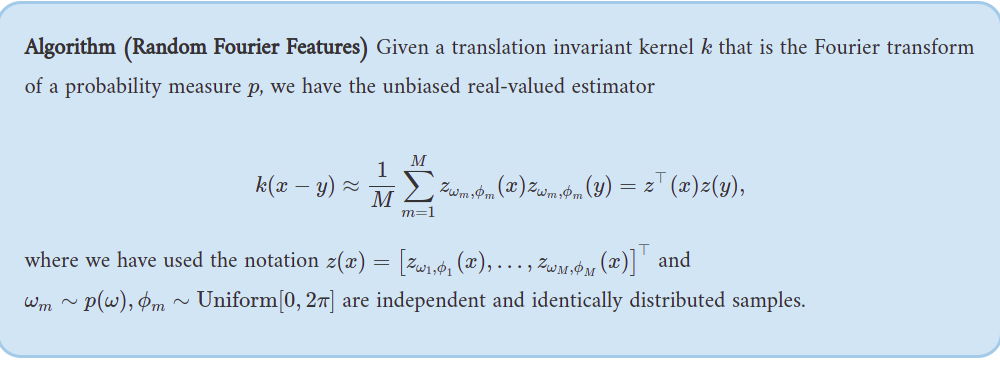

<div dir='rtl'>
<h2>
kernalized the data
</h2>
</div> 
<hr/>


<div dir='rtl'>
برای kernel perceptron  ابتدا کرنل را بر روی دیتا ست اعمال میکنیم با استفاده از kernal opproximation  که من  از rbssampler استفاده کزردم و بعد و بعد با این دیتا kernelized شده مدل پرسپترون را اموزش میدهیم.
</div>

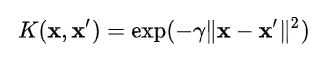

<div dir='rtl'>
پارامتر  n_components که نشان دهنده فیچر ها در فضای که میخواهیم فیچر ها را به ان مپ کنیم میباشد و در واقع دایمنشن فیچر اسپیس جدید است که من مقدار ۴۰۰۰ را با آن دادم و در واقع در این مرحله برای mapping از  Monte Carlo approximation استفاده میشود . و مقدار گاما که پارمتر کرنل گاوس در فرمول بالا میباشد را برابر با ۰.۶ قرار دادم.
</div>

In [ ]:
# build perceptron with kernel
# first kernelised x_train and x_test and then train perceptron with it 
rbf= RBFSampler(gamma=0.6,random_state=1,n_components=4000)
x_train_rbf=rbf.fit_transform(train_x)   #(103594, 100)
x_test_rbf=rbf.fit_transform(test_x)   #(25893, 100)

<div dir='rtl'>
در اینجا مدل پرسپترون جدید را بر روی دیتا ست kernelized شده فیت میکنیم و آموزش میدهیم و در نهایت هم بر روی داده تست kernelized شده تست میکنیم و مشاهده میشود که 
accuracy از ۸۳ به ۹۴ میرسد که پیشرفت خوبی است .


</div>

<div dir='rtl'>
دقت شود که kernelized شدن هم برای دیتا ست آموزشی و هم تست باید انجام شود چون مدل بر اساس فضای فیچر ترین آموزش میبیند در نتیحه تست هم باید همان باشد.
در نهایت مشابه شد که با kernel perceptron به نتیجه بهتری رسیدیم چون دیتا ست غیر خطی بود.
</div>

In [ ]:
# build perceptron model with kernalized data
# building perceptron model
perceptron_kernalized_model=Perceptron()

# train model 
perceptron_kernalized_model.fit(x_train_rbf,train_y)


Perceptron()

In [ ]:
# get predicteion on test set using trained perceptron_kernalized_model
y_test_prediction_kernelized=perceptron_kernalized_model.predict(x_test_rbf)
y_test_prediction_kernelized

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
# get accuracy of kernelized perceptron
accuracy_score(test_y, y_test_prediction_kernelized)  #0.9421079056115552

0.9443865137295794